#### Intials

In [402]:
# Cuántos nodos puedo tener donde puedo calcular la verosimilitud sin que explote?
d = 15
print(f"Para {d} nodos, tengo {2**d} combinaciones posibles para el vector X")

Para 15 nodos, tengo 32768 combinaciones posibles para el vector X


#### FVBM

Usando la FVBM, comparamos lo que tarda en calcular la verosimilitud (L) con la pseudo-verosimilitud (PL)

$\Theta = \{\theta, b\}$

$b = (b_1, b_2,\dots,b_d)$

$\theta = (\theta_{i,j})$ para $i\in\{1,\dots,d\}$ y $j<i$

In [1]:
import numpy as np
import models.fvbm as fvbm
from random import random


d = 10
theta = {}
b = {}
for i in range(d):
    for j in range(i):
        theta[(i,j)] = (random()-0.5)*4

assert(len(theta) == d*(d-1)/2)

for i in range(d):
    b[i] = (random()-0.5)*4
b_vector = np.array(list(b.values()))
assert(len(b) == d)

In [101]:
from importlib import reload
reload(fvbm)

fvbm1 = fvbm.FVBM({"theta":theta, "b":b}, d=d)

fvbm1.sample(10000)

res1 = fvbm1.fit_logpl()
res2 = fvbm1.fit_logl()

print(sum(fvbm1.pl_params_diff))
print(sum(fvbm1.l_params_diff))

4.623612954712985
4.493476630709285


In [109]:
reload(fvbm)
from tqdm import tqdm


d = 10
theta = {}
b = {}
for i in range(d):
    for j in range(i):
        theta[(i,j)] = (random()-0.5)*4

assert(len(theta) == d*(d-1)/2)

for i in range(d):
    b[i] = (random()-0.5)*4
b_vector = np.array(list(b.values()))
assert(len(b) == d)

n = [2**7,2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15]
MAE_l = []
MAE_pl = []
for n_ in tqdm(n):
    fvbm1 = fvbm.FVBM({"theta":theta, "b":b}, d=d)
    fvbm1.sample(n_)
    
    res = fvbm1.fit_logl()
    MAE_l.append(sum(fvbm1.l_params_diff).copy())
    
    res = fvbm1.fit_logpl()
    MAE_pl.append(sum(fvbm1.pl_params_diff).copy())

100%|██████████| 9/9 [00:17<00:00,  1.97s/it]


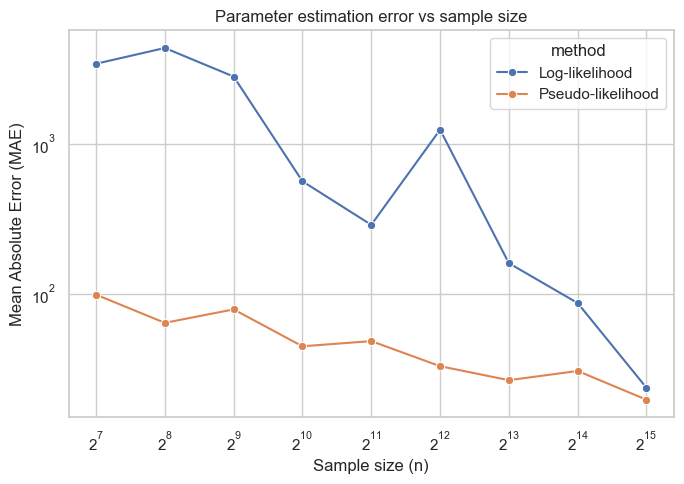

In [110]:
import pandas as pd

df = pd.DataFrame({
    "n": n + n,
    "MAE": MAE_l + MAE_pl,
    "method": ["Log-likelihood"] * len(n) + ["Pseudo-likelihood"] * len(n)
})

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(7,5))
sns.lineplot(
    data=df,
    x="n",
    y="MAE",
    hue="method",
    marker="o"
)

plt.xscale("log", base=2)
plt.yscale("log")

plt.xlabel("Sample size (n)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Parameter estimation error vs sample size")

plt.tight_layout()
plt.show()


#### FVBR-NC

In [129]:
import numpy as np
from random import random


d = 10
b = {}
alpha = {}

for i in range(d):
    b[i] = (random()-0.5)*4
    alpha[i] = (random()-0.5)*2
b_vector = np.array(list(b.values()))
alpha_vector = np.array(list(alpha.values()))
assert(len(b) == d)
assert(len(alpha) == d)
params_true = {"b":b,"alpha":alpha}

In [156]:
from importlib import reload
import models.fvbr_nc as fvbr_nc
reload(fvbr_nc)

fvbr1 = fvbr_nc.FVBR_NC(parameters=params_true, d=d)

fvbr1.sample(size=100)

fvbr1.fit_logl()

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 375.78213669276624
        x: [-5.410e-02 -1.173e+00 ... -5.199e-03 -1.005e+00]
      nit: 315
      jac: [ 3.131e-03  1.009e-03 ... -2.796e-03 -4.442e-05]
     nfev: 334
     njev: 334
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>

In [161]:
reload(fvbr_nc)
from tqdm import tqdm


d = 10
b = {}
alpha = {}

for i in range(d):
    b[i] = (random()-0.5)*4
    alpha[i] = (random()-0.5)*2
b_vector = np.array(list(b.values()))
alpha_vector = np.array(list(alpha.values()))
assert(len(b) == d)
assert(len(alpha) == d)
params_true = {"b":b,"alpha":alpha}

n = [2**6, 2**7,2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15]
MAE_l = []
MAE_pl = []
for n_ in tqdm(n):
    fvbr1 = fvbr_nc.FVBR_NC({"alpha":alpha, "b":b}, d=d)
    fvbr1.sample(n_)
    
    res = fvbr1.fit_logl()
    MAE_l.append(sum(fvbr1.l_params_diff).copy())
    
    res = fvbr1.fit_logpl()
    MAE_pl.append(sum(fvbr1.pl_params_diff).copy())

100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


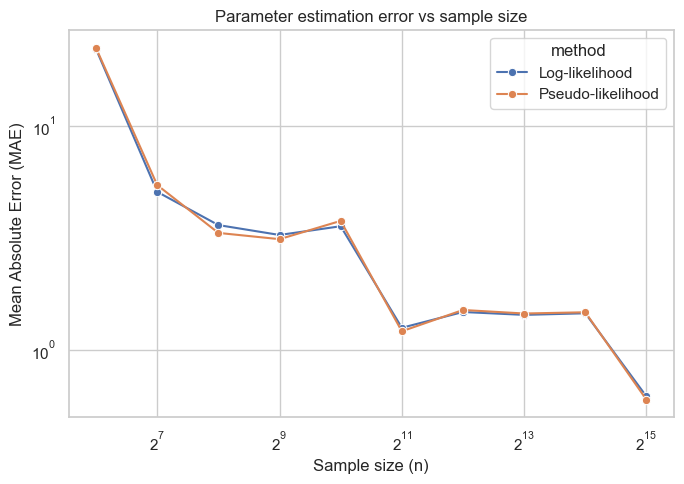

In [162]:
import pandas as pd

df = pd.DataFrame({
    "n": n + n,
    "MAE": MAE_l + MAE_pl,
    "method": ["Log-likelihood"] * len(n) + ["Pseudo-likelihood"] * len(n)
})

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(7,5))
sns.lineplot(
    data=df,
    x="n",
    y="MAE",
    hue="method",
    marker="o"
)

plt.xscale("log", base=2)
plt.yscale("log")

plt.xlabel("Sample size (n)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Parameter estimation error vs sample size")

plt.tight_layout()
plt.show()